# MLP Model

In [1]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:

## Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Feature Data
filename = "features.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)

data = pd.read_csv(filepath,index_col=False, header=0)
print(len(data))
data.head()

339


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2.965,2018.869,1990,7.17,8.8,1,0,0,0,0,0,0,0,0,0,0,0
1,3.196,1640.310,1990,7.48,22.7,0,1,0,0,0,0,0,0,0,0,0,0
2,4.403,1559.289,1990,7.57,29.8,0,0,1,0,0,0,0,0,0,0,0,0
3,4.853,1299.971,1990,7.69,26.8,0,0,0,1,0,0,0,0,0,0,0,0
4,5.357,1143.417,1990,7.96,53.9,0,0,0,0,1,0,0,0,0,0,0,0


In [3]:
def lag_data(lag_count, df):
    features = []
    targets = []
    for i in range(1, lag_count+1):
        df['lag%s' % i] = df.Solar.shift(i)
        df['peek%s' % i] = df.Solar.shift(-1*i)
        features.append('lag%s' % i)
        targets.append('peek%s' % i)
        
    #differencing
    df['diff1'] = df.Solar.diff(1)
    return features, targets, df.iloc[lag_count:-1*lag_count] #dropped rows with nan
    
lag_count = 12
features, targets, data = lag_data(lag_count, data)

print(len(data))

315


In [4]:
print(features, targets)

['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'] ['peek1', 'peek2', 'peek3', 'peek4', 'peek5', 'peek6', 'peek7', 'peek8', 'peek9', 'peek10', 'peek11', 'peek12']


## Improve model by adding features

In [5]:
X = data[["year", "Price", "lag1", "peek1", "lag2", "peek2", "lag3", "peek3","lag4","peek4","lag5", "peek5","lag6", "peek6", "lag7", "peek7", "lag8", "peek8", "lag9", "peek9", "lag10","peek10", "lag11","peek11"]] 
y = data["Solar"].values.reshape(-1, 1)
print(X.shape, y.shape)

(315, 24) (315, 1)


## Split dataset into Train and Test

Given the dataset is a time series, we will leave the last 12 months as test data.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into Train and Test

X_train, X_test = X[1:len(X)-12], X[len(X)-12:]
y_train, y_test = y[1:len(X)-12], y[len(X)-12:]


## Scale the data and plot the difference

In [7]:
# Scale the data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print("train observations ", len(X_train_scaled), "test observations: ",len(X_test_scaled))

302 12 302 12
train observations  302 test observations:  12


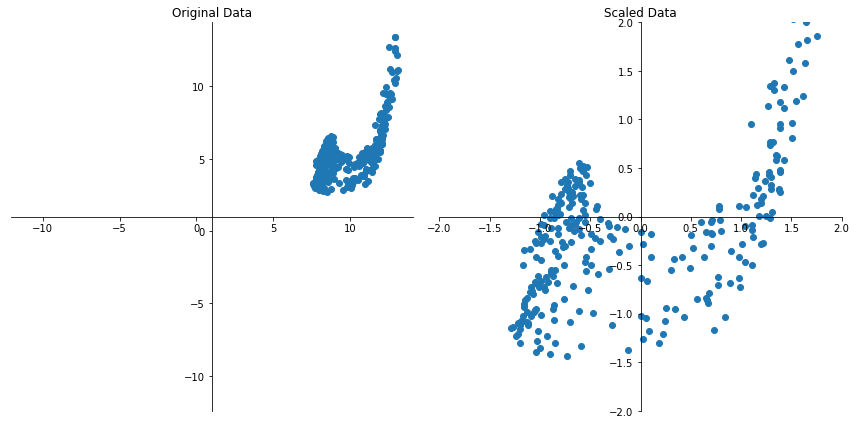

In [8]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Price"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Price"], y_train)
axes2.scatter(X_train_scaled[:,1], y_train_scaled[:])

# Save our graph 
plt.tight_layout()
plt.savefig("../../images/LR_scaled_features.png")
plt.show()


## Create the MLP model

Train the model and plot results

In [9]:
from sklearn.neural_network import MLPRegressor
print("Row number of testing data : ", len(X_test_scaled))

# train autoregression
mlp = MLPRegressor(max_iter=1000, learning_rate_init=0.1, random_state=0, learning_rate='adaptive',
                   activation='relu', solver='adam', tol=0.0, verbose=2 , hidden_layer_sizes = (20,20))



Row number of testing data :  12


In [10]:
import numpy as np
y_train_ravel = np.ravel(y_train_scaled)
mlp.fit(X_train_scaled, y_train_ravel)

Iteration 1, loss = 5.24353292
Iteration 2, loss = 2.03086308
Iteration 3, loss = 0.41532253
Iteration 4, loss = 0.40768384
Iteration 5, loss = 0.19137981
Iteration 6, loss = 0.17743926
Iteration 7, loss = 0.17371502
Iteration 8, loss = 0.11268844
Iteration 9, loss = 0.17287228
Iteration 10, loss = 0.10680940
Iteration 11, loss = 0.10896848
Iteration 12, loss = 0.06630323
Iteration 13, loss = 0.08836251
Iteration 14, loss = 0.05431658
Iteration 15, loss = 0.06008242
Iteration 16, loss = 0.03089377
Iteration 17, loss = 0.04792155
Iteration 18, loss = 0.02298896
Iteration 19, loss = 0.03844996
Iteration 20, loss = 0.03312612
Iteration 21, loss = 0.02367918
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0, validation_fraction=0.1, verbose=2,
       warm_start=False)

In [11]:
y_pred = mlp.predict(X_test_scaled)

In [12]:
mlp.score(X_test_scaled, y_test_scaled)

0.7641087240871138

In [13]:
from sklearn.metrics import mean_squared_error

predictions = mlp.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = mlp.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45891241229818025, R2: 0.7641087240871138


In [14]:
X_test_scaled.shape

(12, 24)

In [15]:
X_test.columns

Index(['year', 'Price', 'lag1', 'peek1', 'lag2', 'peek2', 'lag3', 'peek3',
       'lag4', 'peek4', 'lag5', 'peek5', 'lag6', 'peek6', 'lag7', 'peek7',
       'lag8', 'peek8', 'lag9', 'peek9', 'lag10', 'peek10', 'lag11', 'peek11'],
      dtype='object')

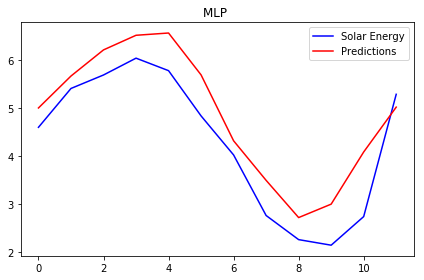

In [16]:
# plot
y_test_ravel = np.ravel(y_test_scaled)
plt.plot(y_test_ravel, color='blue')
plt.plot(predictions, color='red')
plt.legend(['Solar Energy','Predictions'], loc='best')
plt.title("MLP ")
# Save our graph 
plt.tight_layout()
#plt.savefig("static/images/MLPmodel"+ history +".png")
plt.show()

In [17]:
# get the predict value
Xfile = "X_predict.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,Xfile)
X_predict = pd.read_csv(filepath,index_col=False, header=0)

X2file = "X_predict2.csv"
filepath = os.path.join(output_data,X2file)
X_predict2 = pd.read_csv(filepath,index_col=False, header=0)

In [18]:

X_predict.columns

Index(['year', 'Price', 'lag1', 'peek1', 'lag2', 'peek2', 'lag3', 'peek3',
       'lag4', 'peek4', 'lag5', 'peek5', 'lag6', 'peek6', 'lag7', 'peek7',
       'lag8', 'peek8', 'lag9', 'peek9', 'lag10', 'peek10', 'lag11', 'peek11',
       'lag12', 'peek12'],
      dtype='object')

In [19]:
X_test.columns

Index(['year', 'Price', 'lag1', 'peek1', 'lag2', 'peek2', 'lag3', 'peek3',
       'lag4', 'peek4', 'lag5', 'peek5', 'lag6', 'peek6', 'lag7', 'peek7',
       'lag8', 'peek8', 'lag9', 'peek9', 'lag10', 'peek10', 'lag11', 'peek11'],
      dtype='object')

In [20]:
X_p = X_predict.drop(columns=["lag12","peek12"])
X_p2 = X_predict2.drop(columns=["lag12","peek12"])


In [21]:
X_predict_scaled = X_scaler.transform(X_p)
y_predict = mlp.predict(X_predict_scaled)
y_predict_ravel = np.ravel(y_predict)

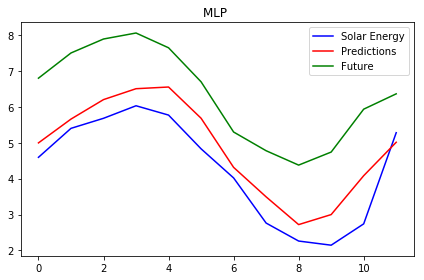

In [22]:
# plot
y_test_ravel = np.ravel(y_test_scaled)
plt.plot(y_test_ravel, color='blue')
plt.plot(predictions, color='red')
plt.plot(y_predict_ravel, color="green")
plt.legend(['Solar Energy','Predictions', "Future"], loc='best')
plt.title("MLP ")
# Save our graph 
plt.tight_layout()
#plt.savefig("static/images/MLPmodel"+ history +".png")
plt.show()

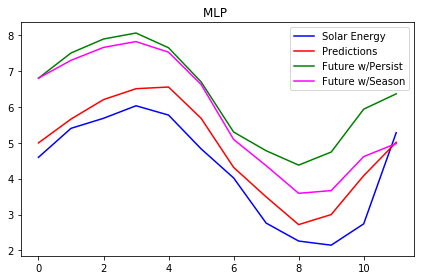

In [24]:
X_predict2_scaled = X_scaler.transform(X_p2)
y_predict2 = mlp.predict(X_predict2_scaled)
y_predict2_ravel = np.ravel(y_predict2)
# plot
y_test_ravel = np.ravel(y_test_scaled)
plt.plot(y_test_ravel, color='blue')
plt.plot(predictions, color='red')
plt.plot(y_predict_ravel, color="green")
plt.plot(y_predict2_ravel, color="magenta")
plt.legend(['Solar Energy','Predictions', "Future w/Persist", "Future w/Season"], loc='best')
plt.title("MLP ")
# Save our graph 
plt.tight_layout()
#plt.savefig("static/images/MLPmodel"+ history +".png")
plt.show()

In [35]:
y_predict2

array([6.80374394, 7.30198039, 7.6619746 , 7.82511429, 7.52907441,
       6.63029951, 5.09537405, 4.36400982, 3.59120601, 3.66683374,
       4.61545705, 4.97993448])

In [40]:
y_test_scaled

array([[4.59538675],
       [5.40380196],
       [5.68411451],
       [6.03411803],
       [5.77393843],
       [4.83285227],
       [4.02082345],
       [2.76122377],
       [2.25944881],
       [2.14381343],
       [2.73902591],
       [5.28248806]])

In [38]:
y_test_ravel

array([4.59538675, 5.40380196, 5.68411451, 6.03411803, 5.77393843,
       4.83285227, 4.02082345, 2.76122377, 2.25944881, 2.14381343,
       2.73902591, 5.28248806])

In [41]:
y_test

array([[14.404],
       [15.97 ],
       [16.513],
       [17.191],
       [16.687],
       [14.864],
       [13.291],
       [10.851],
       [ 9.879],
       [ 9.655],
       [10.808],
       [15.735]])

In [44]:
future_values = y_scaler.inverse_transform(y_predict)

In [45]:
values = y_test.reshape(-1)

In [46]:

values

array([14.404, 15.97 , 16.513, 17.191, 16.687, 14.864, 13.291, 10.851,
        9.879,  9.655, 10.808, 15.735])

In [47]:
future_values

array([18.68186033, 20.04397007, 20.79874483, 21.12317179, 20.32442009,
       18.48583786, 15.77259216, 14.76036394, 13.98344044, 14.68875065,
       17.00697793, 17.83597643])

In [52]:
to_plot = np.append(values,future_values)

In [53]:
to_plot

array([14.404     , 15.97      , 16.513     , 17.191     , 16.687     ,
       14.864     , 13.291     , 10.851     ,  9.879     ,  9.655     ,
       10.808     , 15.735     , 18.68186033, 20.04397007, 20.79874483,
       21.12317179, 20.32442009, 18.48583786, 15.77259216, 14.76036394,
       13.98344044, 14.68875065, 17.00697793, 17.83597643])

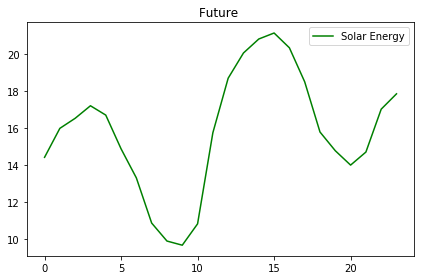

In [78]:
import calendar

plt.plot(to_plot, color='green')
plt.legend(['Solar Energy'], loc='best')
plt.title("Future ")
# plt.xticks(1+np.arange(12), calendar.month_name[1:13], rotation=40)
# Save our graph 
plt.tight_layout()
#plt.savefig("static/images/MLPmodel"+ history +".png")
plt.show()

In [63]:
train_plot = y_train.reshape(-1)

In [65]:
all_plot = np.append(train_plot,to_plot)


In [124]:
len(all_plot)


326

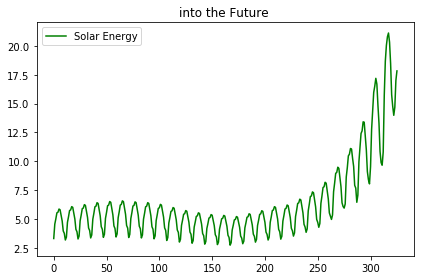

In [68]:
plt.plot(all_plot, color='green')
plt.legend(['Solar Energy'], loc='best')
plt.title("into the Future ")
# Save our graph 
plt.tight_layout()
#plt.savefig("static/images/MLPmodel"+ history +".png")
plt.show()

In [70]:
# Get the time series
past = "monthdata.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,past)
past_data = pd.read_csv(filepath,index_col=False, header=0)

In [73]:
past = past_data["Value"]

In [75]:
pastandnew = np.append(past,future_values)b

In [107]:
future_values

array([18.68186033, 20.04397007, 20.79874483, 21.12317179, 20.32442009,
       18.48583786, 15.77259216, 14.76036394, 13.98344044, 14.68875065,
       17.00697793, 17.83597643])

In [113]:
past.tail(1)

350    18.047
Name: Value, dtype: float64

In [125]:
print(len(future_values))
xes = range(0, len(future_values)+1)
print(xes)
print(future_values)
bump = len(past)
print(bump)
print(xes)
#moved = [(x,y) for (x in xes) and (y in future_values)]
# mx = [x0+bump for x0 in xes[:]]
# my = [y for y in future_values]
# # plot data
# fig, ax = plt.subplots(1)
# ax.plot(past, c='r')
# ax.scatter(x = mx, y = my , c='green')
# ax.autoscale_view()
# plt.show()


# plt.plot(pastandnew, color='cyan')
# plt.plot(moved, color='red')
# #plt.legend(['Solar Energy'], loc='best')
# plt.title("into the Future ")
# # Save our graph 
# plt.tight_layout()
# #plt.savefig("static/images/MLPmodel"+ history +".png")
# plt.show()

12
range(0, 13)
[18.68186033 20.04397007 20.79874483 21.12317179 20.32442009 18.48583786
 15.77259216 14.76036394 13.98344044 14.68875065 17.00697793 17.83597643]
351
range(0, 13)


In [135]:
datesname = "monthpredict.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,datesname)
dates_predict = pd.read_csv(filepath,index_col=False, header=0)
dates_predict.tail()

,YYYYMM,Value
358,201811,14.760364
359,201812,13.983440
360,201901,14.688751
361,201902,17.006978
362,201903,17.835976


In [136]:
#convert the dates into real dates
dates_predict['dates'] = pd.to_datetime(dates_predict["YYYYMM"], format="%Y%m")
timeseriep = dates_predict[['dates','Value']]
timeseriep = timeseriep.set_index('dates')
print("Total Observations " ,len(timeseriep))
timeseriep.head()

Total Observations  363


,Value
dates,
1989-01-01,2.798
1989-02-01,3.016
1989-03-01,4.156
1989-04-01,4.581
1989-05-01,5.057


ValueError: ordinal must be >= 1

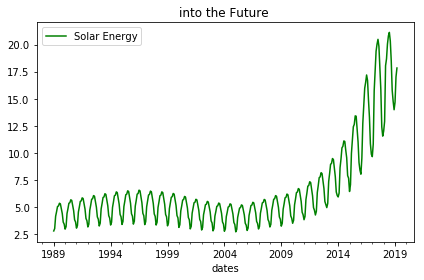

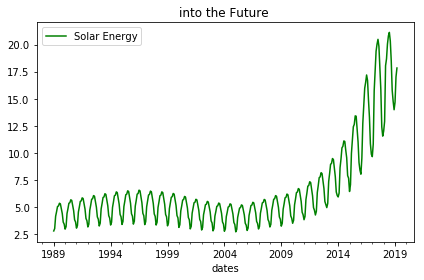

In [139]:
timeseriep.plot(color='green')
plt.legend(['Solar Energy'], loc='best')
plt.title("into the Future ")

# Save our graph 
plt.tight_layout()
plt.savefig("../../images/MLPpredict12.png")
plt.show()

In [141]:
latest = timeseriep[-48:]
latest

,Value
dates,
2015-04-01,11.219000
2015-05-01,12.412000
2015-06-01,12.632000
2015-07-01,13.420000
2015-08-01,13.384000
2015-09-01,12.161000
2015-10-01,11.008000
2015-11-01,9.103000
2015-12-01,8.400000


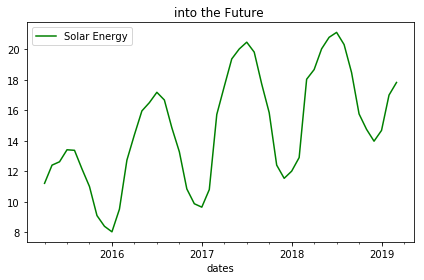

In [142]:
latest.plot(color='green')
plt.legend(['Solar Energy'], loc='best')
plt.title("into the Future ")
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/MLPpredict12latest.png")
plt.show()

In [143]:
days = pd.DatetimeIndex(start='1989-01-01', end='2018-03-01', freq='M')

In [145]:
len(days)


350

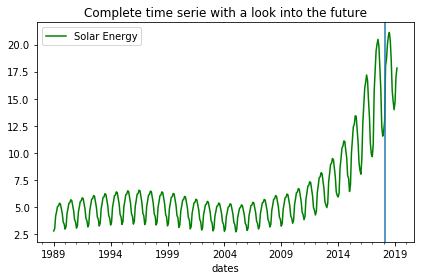

In [150]:
from matplotlib.pyplot import axvline
timeseriep.plot(color='green')
axvline(x=days[-1].date())

plt.legend(['Solar Energy'], loc='best')
plt.title("Complete time serie with a look into the future")

# Save our graph 
plt.tight_layout()
plt.savefig("../../images/MLPpredict12.png")
plt.show()


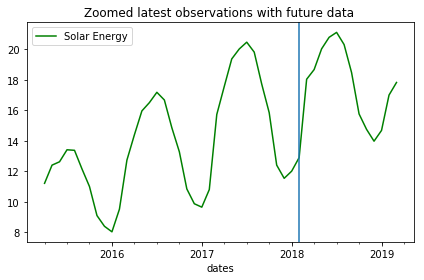

In [151]:
latest.plot(color='green')
axvline(x=days[-1].date())
plt.legend(['Solar Energy'], loc='best')
plt.title("Zoomed latest observations with future data ")
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/MLPpredict12latest.png")
plt.show()